In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
data_path = '../data/train'
train_path = os.path.join(data_path, 'train_ratings.csv')

train_data = pd.read_csv(train_path)

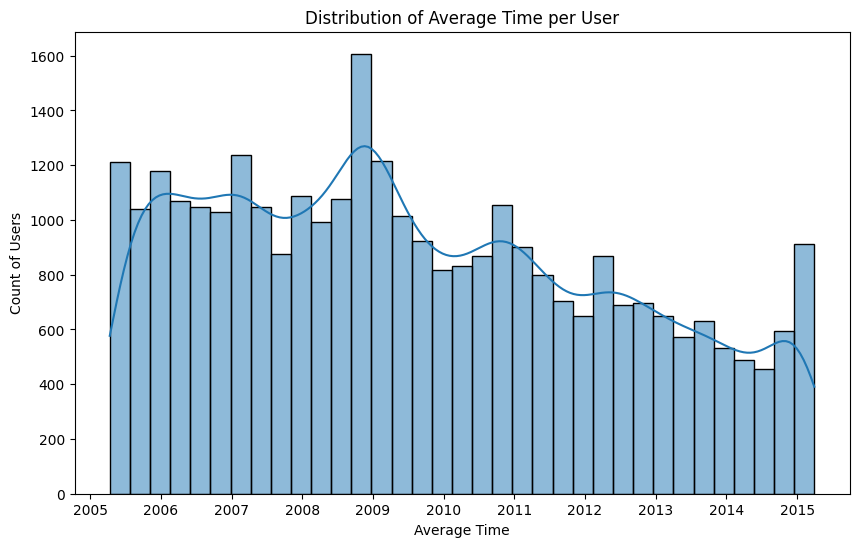

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Unix timestamp를 datetime 객체로 변환 (unit='s'는 초 단위를 의미)
train_data['readable_time'] = pd.to_datetime(train_data['time'], unit='s')

# 유저별 평균 타임스탬프 계산
user_avg_timestamp = train_data.groupby('user')['time'].mean().reset_index()

# 평균 타임스탬프를 다시 사람이 읽기 쉬운 형태로 변환
user_avg_timestamp['avg_readable_time'] = pd.to_datetime(user_avg_timestamp['time'], unit='s')

# 2. 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(user_avg_timestamp['avg_readable_time'], kde=True) # kde=True는 곡선을 같이 그려줍니다
plt.title('Distribution of Average Time per User') # 그래프 제목
plt.xlabel('Average Time') # x축 라벨
plt.ylabel('Count of Users') # y축 라벨
plt.show()

In [5]:
train_data

,user,item,time,readable_time
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43
...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49
5154467,138493,4958,1260209482,2009-12-07 18:11:22
5154468,138493,68319,1260209720,2009-12-07 18:15:20
5154469,138493,40819,1260209726,2009-12-07 18:15:26


In [6]:
# 인기있는 아이템들
popular_items = train_data.groupby('item')['user'].count().reset_index(name='count')
popular_items = popular_items.sort_values(by='count', ascending=False)
print(popular_items.head(3000))

       item  count
1435   2571  19699
1642   2959  18437
179     296  18202
193     318  18168
220     356  17339
...     ...    ...
623    1161    245
2189   3998    245
6119  80363    245
2837   5410    245
3225   6448    244

[3000 rows x 2 columns]


In [7]:
genre_path = os.path.join(data_path, 'genres.tsv')
genre = pd.read_csv(genre_path, sep='\t')

In [8]:

genre_list = genre['genre'].unique()
print(f'장르 종류 : {genre_list}')
print(f'장르 개수: {len(genre_list)}')

장르 종류 : ['Crime' 'Drama' 'Action' 'Sci-Fi' 'Thriller' 'Comedy' 'Romance' 'War'
 'Adventure' 'Fantasy' 'Horror' 'Mystery' 'Animation' 'Children'
 'Film-Noir' 'Musical' 'Western' 'Documentary']
장르 개수: 18


In [9]:
genres_by_item = genre.groupby('item')['genre'].apply(list).reset_index(name='genres')
empty_row = len(genres_by_item[genres_by_item['genres'].apply(lambda x: len(x) == 0)])

print('총 item 개수: ',train_data['item'].nunique())
print(f'영화 장르가 없는 영화의 개수(결측치): {empty_row}')
print('item 별 영화 장르')
print(genres_by_item)

총 item 개수:  6807
영화 장르가 없는 영화의 개수(결측치): 0
item 별 영화 장르
        item                                             genres
0          1  [Adventure, Animation, Children, Comedy, Fantasy]
1          2                     [Adventure, Children, Fantasy]
2          3                                  [Comedy, Romance]
3          4                           [Comedy, Drama, Romance]
4          5                                           [Comedy]
...      ...                                                ...
6802  118700                                            [Drama]
6803  118900                                            [Drama]
6804  118997               [Children, Comedy, Fantasy, Musical]
6805  119141                                   [Action, Comedy]
6806  119145                 [Action, Adventure, Comedy, Crime]

[6807 rows x 2 columns]


In [10]:
popular_items_data = pd.merge(popular_items, genres_by_item, on='item', how='left')
print(popular_items_data.head(1000))

      item  count                            genres
0     2571  19699        [Action, Sci-Fi, Thriller]
1     2959  18437  [Action, Crime, Drama, Thriller]
2      296  18202  [Comedy, Crime, Drama, Thriller]
3      318  18168                    [Crime, Drama]
4      356  17339     [Comedy, Drama, Romance, War]
..     ...    ...                               ...
995   4103   1215   [Action, Adventure, Drama, War]
996    319   1213         [Comedy, Drama, Thriller]
997  34542   1211                     [Documentary]
998   1103   1209                           [Drama]
999   5015   1207                  [Drama, Romance]

[1000 rows x 3 columns]


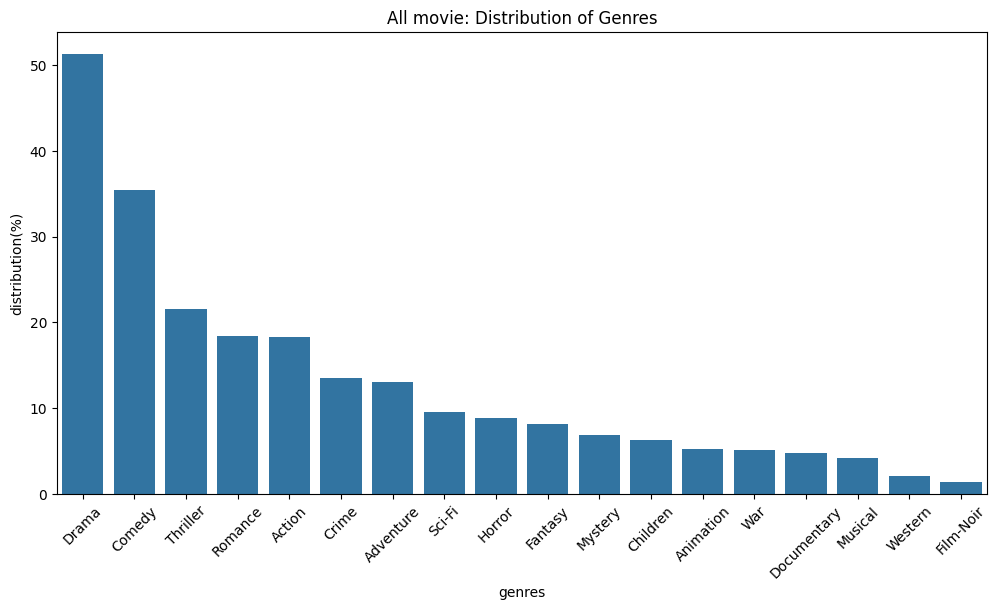

In [11]:
from collections import Counter
import itertools

# genres의 모든 리스트들을 하나의 리스트로 묶기
all_movie_genres = list(itertools.chain(*popular_items_data['genres']))

# 장르별 개수 세기
genre_counts = Counter(all_movie_genres)

import matplotlib.pyplot as plt
import seaborn as sns

sorted_genres = genre_counts.most_common()

x_labels, y_values = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/len(popular_items)*100)))
plt.xticks(rotation=45)
plt.title('All movie: Distribution of Genres')
plt.xlabel('genres')
plt.ylabel('distribution(%)')
plt.show()

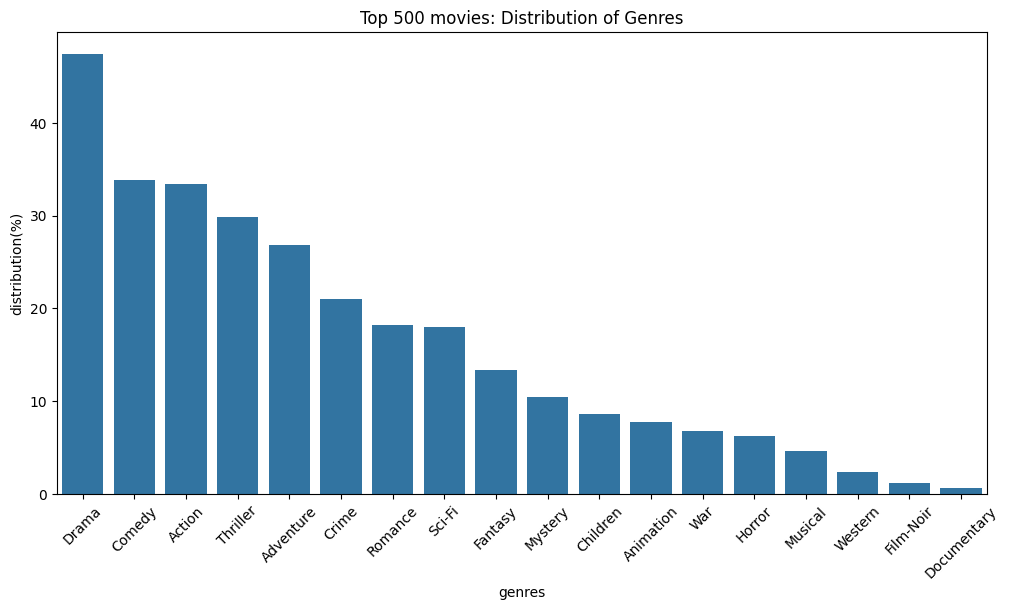

In [12]:
# genres의 모든 리스트들을 하나의 리스트로 묶기
n = 500

top_n_movie_genres = list(itertools.chain(*popular_items_data['genres'][:n]))

# 장르별 개수 세기
top_n_genre_counts = Counter(top_n_movie_genres)

import matplotlib.pyplot as plt
import seaborn as sns

sorted_genres = top_n_genre_counts.most_common()

x_labels, y_values = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/n*100)))
plt.xticks(rotation=45)
plt.title(f'Top {n} movies: Distribution of Genres')
plt.xlabel('genres')
plt.ylabel('distribution(%)')
plt.show()

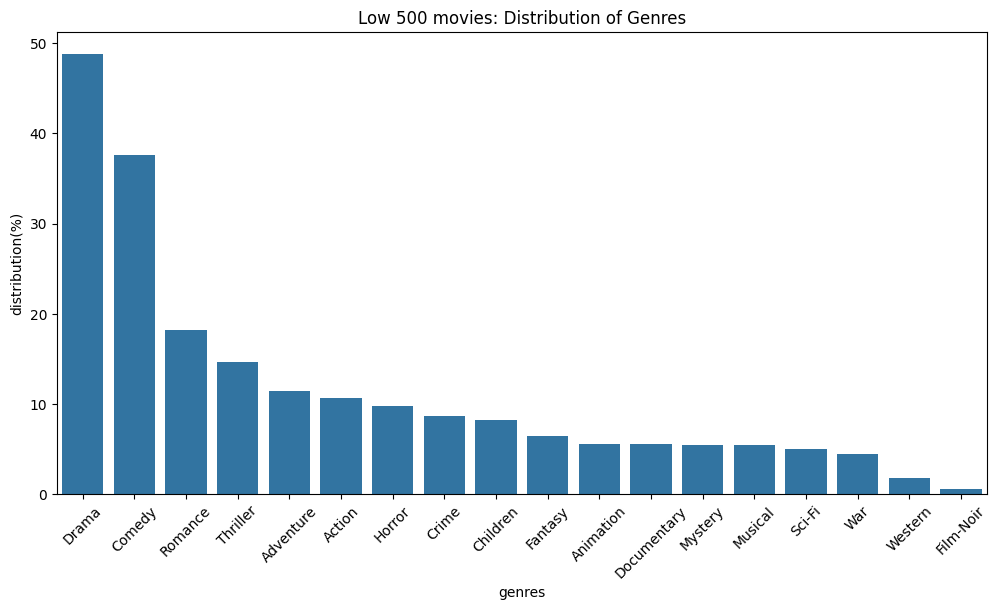

In [13]:
# genres의 모든 리스트들을 하나의 리스트로 묶기
n = 500

low_n_movie_genres = list(itertools.chain(*popular_items_data['genres'][-n:]))

# 장르별 개수 세기
low_n_genre_counts = Counter(low_n_movie_genres)

import matplotlib.pyplot as plt
import seaborn as sns

sorted_genres = low_n_genre_counts.most_common()

x_labels, y_values = zip(*sorted_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/n*100)))
plt.xticks(rotation=45)
plt.title(f'Low {n} movies: Distribution of Genres')
plt.xlabel('genres')
plt.ylabel('distribution(%)')
plt.show()

In [14]:
user_items = train_data.groupby('user')['item'].apply(list).reset_index(name='items')
user_items['item_count'] = user_items['items'].apply(len)

In [15]:
genres_by_item

,item,genres
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,"[Adventure, Children, Fantasy]"
2,3,"[Comedy, Romance]"
3,4,"[Comedy, Drama, Romance]"
4,5,[Comedy]
...,...,...
6802,118700,[Drama]
6803,118900,[Drama]
6804,118997,"[Children, Comedy, Fantasy, Musical]"
6805,119141,"[Action, Comedy]"


In [16]:
user_items

,user,items,item_count
0,11,"[4643, 170, 531, 616, 2140, 2722, 2313, 2688, ...",376
1,14,"[8961, 1396, 471, 2105, 1042, 1947, 1269, 2394...",180
2,18,"[1952, 1283, 3507, 4280, 51084, 593, 318, 356,...",77
3,25,"[261, 22, 2161, 3255, 372, 1093, 428, 175, 214...",91
4,31,"[260, 1196, 1210, 7153, 4993, 5952, 1270, 5855...",154
...,...,...,...
31355,138473,"[524, 3354, 1025, 6565, 69757, 2085, 32, 55282...",63
31356,138475,"[1639, 1673, 1148, 246, 2019, 1267, 1172, 1235...",124
31357,138486,"[2694, 1994, 2723, 441, 2288, 637, 2013, 2423,...",137
31358,138492,"[2115, 908, 58, 2700, 2599, 1500, 1358, 1288, ...",68


In [17]:
from collections import Counter
import itertools

# 아이템 장르 사전
item_genres_dict = genres_by_item.set_index('item')['genres'].to_dict()

# 유저의 아이템 리스트를 받아 장르 개수 세는 함수
def get_genre_counts(items_list):
    all_genres = [item_genres_dict.get(i, []) for i in items_list]
    flat_genres = list(itertools.chain(*all_genres))
    
    return Counter(flat_genres)

user_items['genre_counts'] = user_items['items'].apply(get_genre_counts)
user_items = user_items.sort_values(by='item_count', ascending=False)

In [161]:
# 유저별 장르 선호도를 시각화
def display_user_genre(user_id):
    user_info = user_items[user_items['user'] == user_id]
    genre_counter = user_info['genre_counts'].values[0]
    
    sorted_genres = genre_counter.most_common()
    item_count = user_info['item_count'].values

    x_labels, y_values = zip(*sorted_genres)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(x_labels), y=(list(np.array(y_values)/item_count*100)))
    plt.xticks(rotation=45)
    plt.title(f'User {user_id} movies: Distribution of Genres')
    plt.xlabel('genres')
    plt.ylabel('distribution(%)')
    plt.show()

In [ ]:
24459  107395          48
23717  104003          48
23642  103715          48
23646  103730          48
4843    21208          48
...       ...         ...
2528    11211          32
29208  128756          28
24060  105578          22
15643   68606          19
12135   53188          16

35690 : 전체와 살짝다른 분포
126683

14212   62335          39
12378   54309          39
30100  132598          39
26905  118343          39
27308  120197          39
4802    21070          39
23852  104701          38
22082   96757          38
27789  122299          38
26569  116859          38
2184     9581          38
862      3679          37
2394    10575          35
8561    37385          34
20320   88996          34
2528    11211          32
29208  128756          28
24060  105578          22
15643   68606          19
12135   53188          16

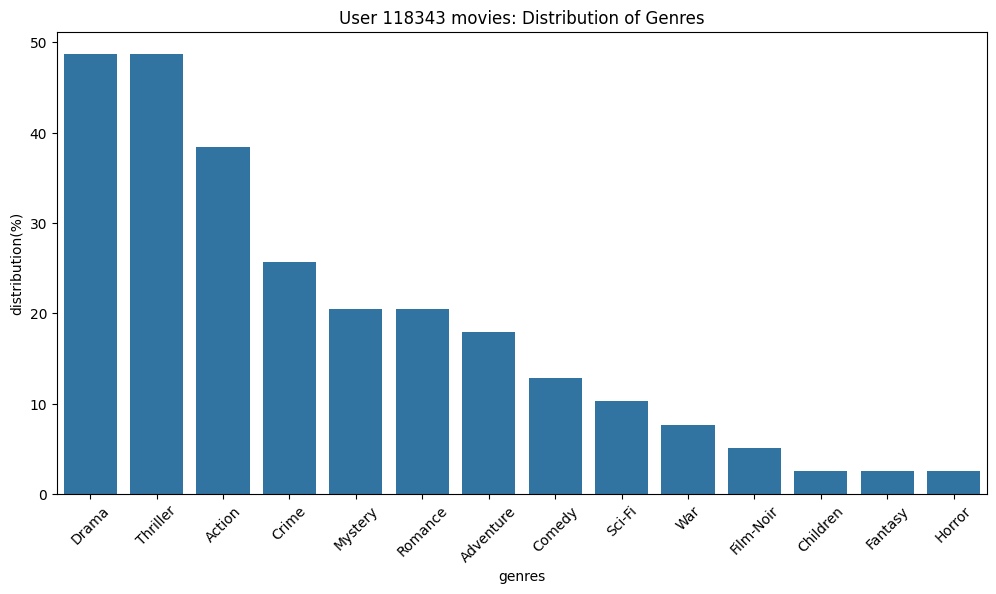

In [163]:
display_user_genre(118343)

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
90%        335.000000
95%        450.050000
99%        758.000000
max       2912.000000
Name: item_count, dtype: float64


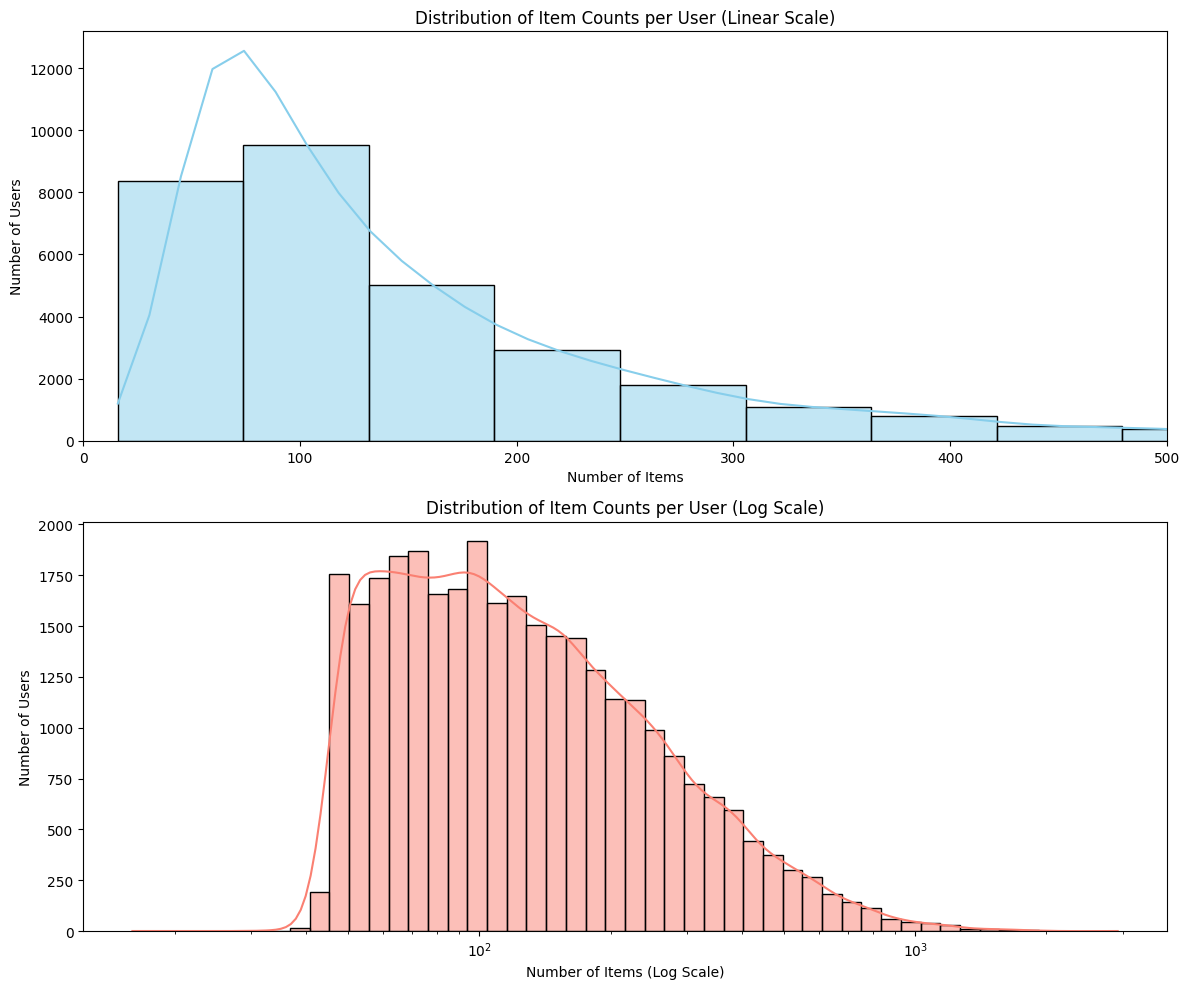

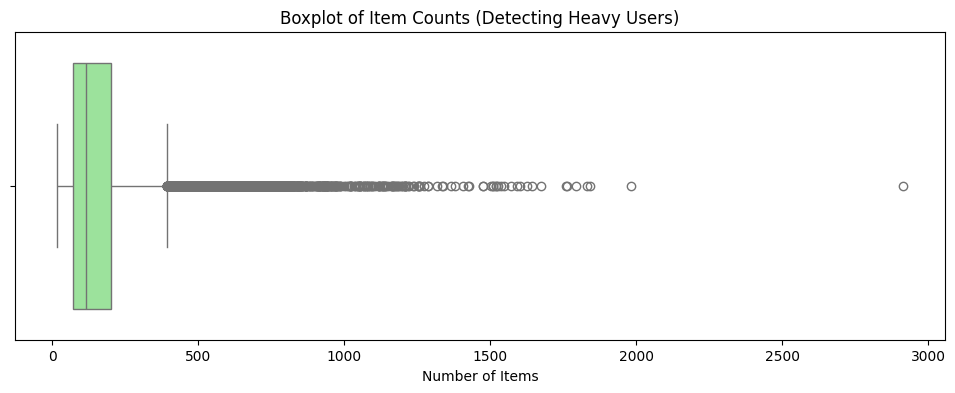

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터프레임 이름이 user_items라고 가정합니다.
# user_items['item_count'] 컬럼을 사용합니다.

# 1. 기초 통계량 확인 (숫자로 먼저 봅니다)
print(user_items['item_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# 그래프 그리기 설정
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# ---------------------------------------------------------
# 시각화 1: 전체 분포 (히스토그램 + KDE)
# 데이터가 한쪽으로 쏠려있을 것이므로, x축 범위를 제한하거나 로그 스케일을 씁니다.
# ---------------------------------------------------------
sns.histplot(user_items['item_count'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Item Counts per User (Linear Scale)')
axes[0].set_xlabel('Number of Items')
axes[0].set_ylabel('Number of Users')

# *꿀팁*: 데이터가 너무 한쪽에 몰려있다면 아래 주석을 풀어보세요.
axes[0].set_xlim(0, 500)  # 500개 이하인 유저들만 확대해서 보기


# ---------------------------------------------------------
# 시각화 2: 로그 스케일 분포 (Log Scale)
# 롱테일 데이터(빈익빈 부익부)를 볼 때 가장 좋은 방법입니다.
# ---------------------------------------------------------
sns.histplot(user_items['item_count'], bins=50, kde=True, ax=axes[1], color='salmon', log_scale=True)
axes[1].set_title('Distribution of Item Counts per User (Log Scale)')
axes[1].set_xlabel('Number of Items (Log Scale)')
axes[1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 추가: 박스플롯 (이상치 확인용)
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))
sns.boxplot(x=user_items['item_count'], color='lightgreen')
plt.title('Boxplot of Item Counts (Detecting Heavy Users)')
plt.xlabel('Number of Items')
plt.show()